In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
df_2023 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2023.csv')
df_2023.head()

/var/folders/qz/n2_fh26j4sq9p69l7t8bkvnw0000gn/T/ipykernel_20713/3759792646.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2023.csv')


,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Pennsylvania,23,6,626,2,2023,3,8,1,G
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,...,Massachusetts,13,6,622,1,2023,4,10,1,L
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,California,91,6,622,1,2023,4,10,1,L
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2023,1,1,1,F
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2023,2,5,1,F


In [4]:
df_2023.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

In [5]:
df_2023.dtypes

DEPARTURES_SCHEDULED     float64
DEPARTURES_PERFORMED     float64
PAYLOAD                  float64
SEATS                    float64
PASSENGERS               float64
FREIGHT                  float64
MAIL                     float64
DISTANCE                 float64
RAMP_TO_RAMP             float64
AIR_TIME                 float64
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
UNIQUE_CARRIER_NAME       object
UNIQUE_CARRIER_ENTITY     object
REGION                    object
CARRIER                   object
CARRIER_NAME              object
CARRIER_GROUP              int64
CARRIER_GROUP_NEW          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS          int64
ORIGIN_STATE_NM           object
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_

    Airport  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
44      ORD           0.353289                0.008868                0.125656
83      DEN           0.346637                0.007039                0.117778
48      LAS           0.342203                0.010484                0.116284
33      HPN           0.340724                0.055119                0.093708
569     DFW           0.328899                0.004990                0.122758
243     ANC           0.327421                0.249469                0.045304
46      MSP           0.321508                0.004115                0.117343
30      ATL           0.319290                0.048268                0.123908
301     TEB           0.318551                0.040383                0.081064
77      BNA           0.316334                0.017816                0.119991


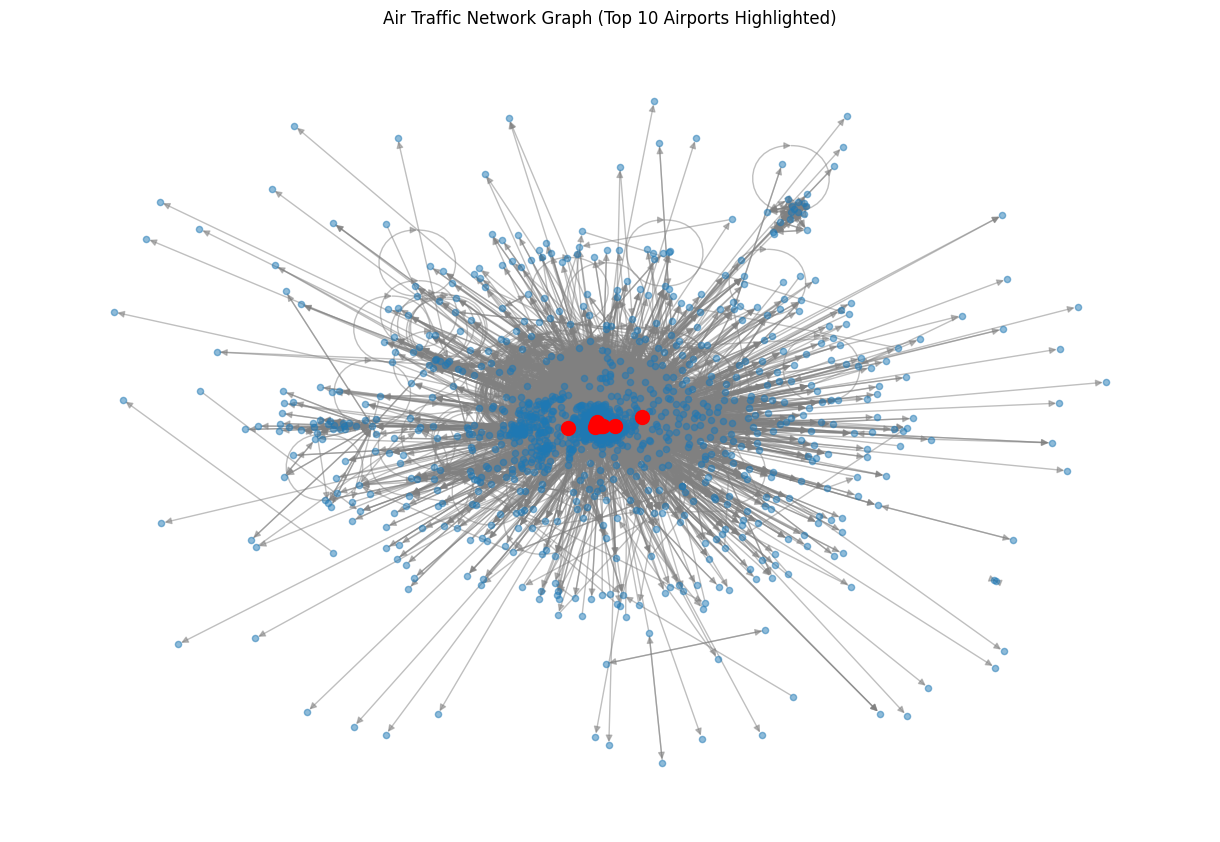

In [7]:
# Create a directed graph
G = nx.DiGraph()

# Add edges representing flights
for _, row in df_2023.iterrows():
    origin = row["ORIGIN"]
    dest = row["DEST"]
    weight = row["DEPARTURES_PERFORMED"]  # Use number of performed departures as edge weight
    
    if G.has_edge(origin, dest):
        G[origin][dest]["weight"] += weight
    else:
        G.add_edge(origin, dest, weight=weight)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Convert centrality measures to DataFrame
centrality_df = pd.DataFrame({
    "Airport": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Sort by importance
centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)
print(centrality_df.head(10))  # Display top 10 busiest airports

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=centrality_df["Airport"].head(10), node_color='red', node_size=100)
plt.title("Air Traffic Network Graph (Top 10 Airports Highlighted)")
plt.show()

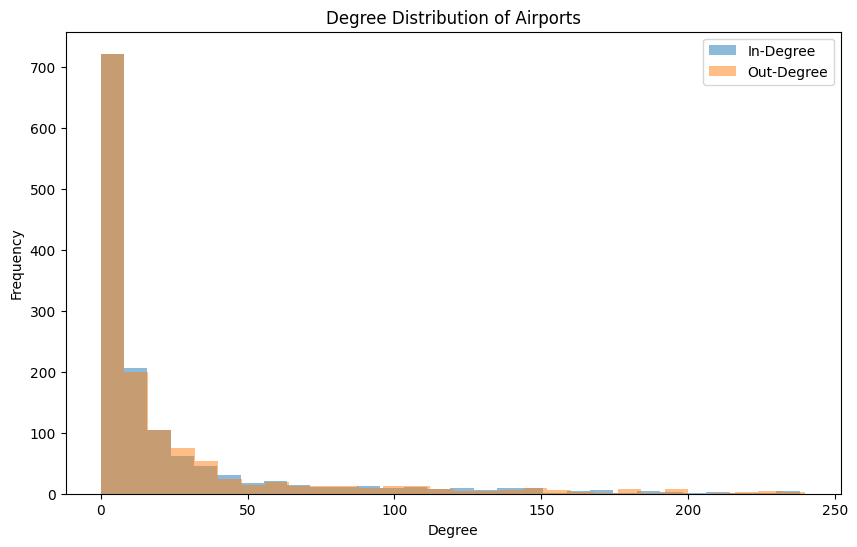

In [8]:
# Degree Distribution
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=30, alpha=0.5, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.5, label='Out-Degree')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Airports")
plt.legend()
plt.show()

     ORIGIN  DEPARTURES_PERFORMED
110     ATL              340777.0
295     DEN              307829.0
900     ORD              303032.0
297     DFW              297107.0
247     CLT              229492.0
651     LAX              206864.0
649     LAS              202590.0
944     PHX              194252.0
1071    SEA              188092.0
727     MCO              173227.0


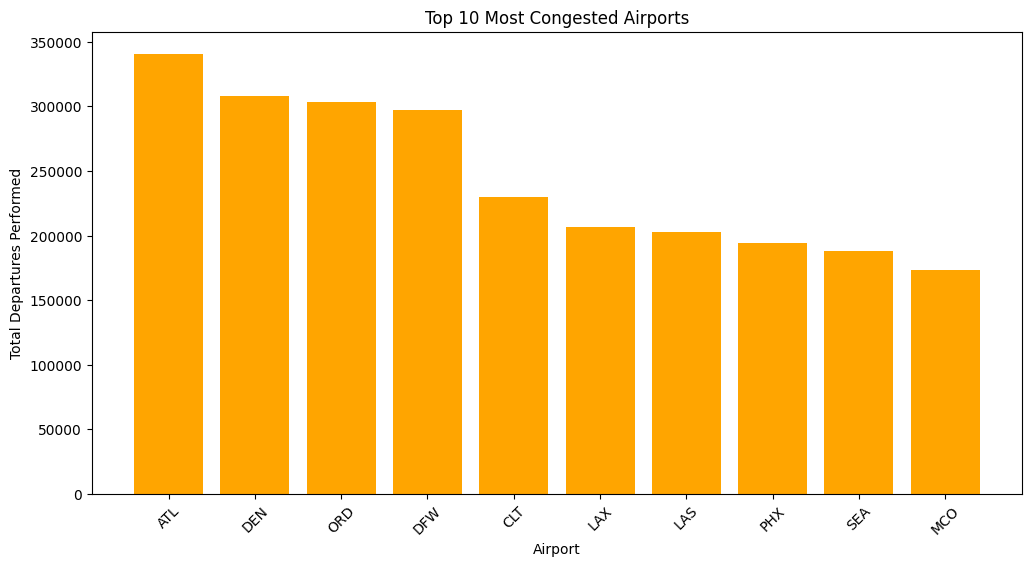

In [10]:
# Air Traffic Congestion Analysis
congestion_df = df_2023.groupby("ORIGIN")["DEPARTURES_PERFORMED"].sum().reset_index()
congestion_df = congestion_df.sort_values(by="DEPARTURES_PERFORMED", ascending=False)
print(congestion_df.head(10))  # Display top 10 most congested airports

# Plot congestion
plt.figure(figsize=(12, 6))
plt.bar(congestion_df["ORIGIN"].head(10), congestion_df["DEPARTURES_PERFORMED"].head(10), color='orange')
plt.xlabel("Airport")
plt.ylabel("Total Departures Performed")
plt.title("Top 10 Most Congested Airports")
plt.xticks(rotation=45)
plt.show()

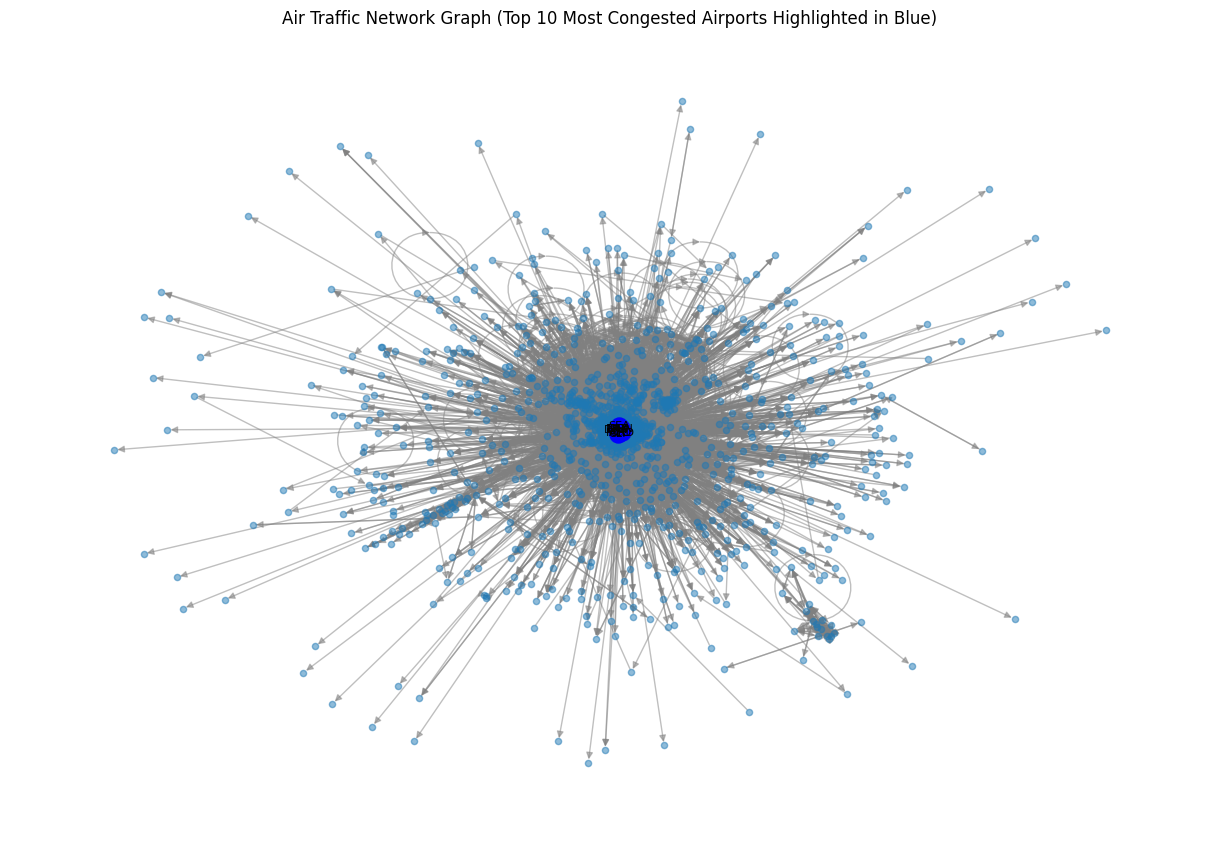

In [11]:
# Visualize Congestion in NetworkX
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=congestion_df["ORIGIN"].head(10).tolist(), node_color='blue', node_size=150)
nx.draw_networkx_labels(G, pos, labels={airport: airport for airport in congestion_df["ORIGIN"].head(10)}, font_size=8)
plt.title("Air Traffic Network Graph (Top 10 Most Congested Airports Highlighted in Blue)")
plt.show()

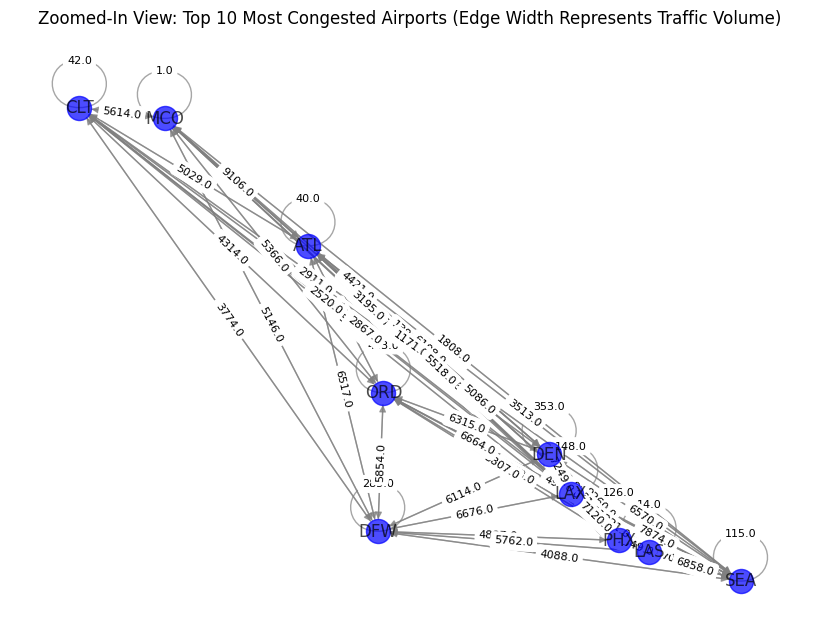

In [16]:
# Zoomed-in visualization for most congested airports
subgraph_nodes = congestion_df["ORIGIN"].head(10).tolist()
subG = G.subgraph(subgraph_nodes)
plt.figure(figsize=(8, 6))
pos_sub = nx.spring_layout(subG, k=0.2)
nx.draw(subG, pos_sub, node_size=300, node_color='blue', edge_color='gray', alpha=0.7, with_labels=True)
edge_labels_sub = {(u, v): f'{subG[u][v]["weight"]}' for u, v in subG.edges()}
nx.draw_networkx_edge_labels(subG, pos_sub, edge_labels=edge_labels_sub, font_size=8)
plt.title("Zoomed-In View: Top 10 Most Congested Airports (Edge Width Represents Traffic Volume)")
plt.show()